<a href="https://colab.research.google.com/github/Akankshya03/ML-MINOR-FEB/blob/main/ML_MINOR_FEB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**

1. Introduction
1. Create Dataset
1. Import Libraries
1. Exploratory data analysis
1. Hyperparameter tuning
1. Modeling and Prediction
1. Conclusion


# **1. Introduction**

In this project, we'll write an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats but our computer will find it a bit more difficult.
### 1.1: Data Description
The folder "datasets" contain two sub-folder "Birman Cat Red" & "doberman dog breed" which contain images of cats and dog respectively.Each folder contains 40 images of each class.
### 1.2: Data
To download the Dataset click [here](https://drive.google.com/drive/folders/1nDOC97_Ule2PUUgDgFmkXOVpKvldQNDD)
### 1.3: Objective
To build a machine learning classification model which classify whether images contain either a dog or a cat. 



# **2. Create Dataset**
In this step we will create a dataset which will contain images of cats and dog. For this we have to go through these following steps.
- Install bing-image-downloder
- Create a directory
- Gather images from bing image

In [ ]:
# Install bing image downloder
!pip install bing-image-downloader

In [ ]:
# Create a directory named as "images"
!mkdir datasets

In [ ]:
# Collect and store the dog images in "datasets" directory
from bing_image_downloader import downloader
downloader.download("doberman dog breed", limit=40,  output_dir='datasets')



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/b9/f4/a7/b9f4a71c740c73eeeef9a90ebb91f4ea.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://adogslove.com/wp-content/uploads/2015/10/c5f3745d7d6d12530bca36e660d985a8.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.thepetscentral.com/wp-content/uploads/2009/06/german-shepherd.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/CgLGbWvkFNg/hqdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.petsworld.in/blog/wp-content/uploads/2014/07/SCHIPPERKE.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://adogslove.com/wp-content/uploads/2015/11/image1.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.metaspoon.com/wp-content/uploads/2014/04/mixed-dogs.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http://www.dogbreedinfo.com/images14/DoodlemanPinscher000

# **Upload dataset to Drive**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#!zip -r /content/drive/MyDrive/dataset/dataset.zip /content/datasets/Birman_Cat_Red/

In [ ]:
# !zip -r /content/drive/MyDrive/dataset/dataset.zip /content/datasets/doberman_dog_breed/

In [ ]:
# Collect and store the dog images in "datasets" directory
from bing_image_downloader import downloader
downloader.download("Birman Cat Red", limit=40,  output_dir='datasets')



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.cat-breeds-encyclopedia.com/images/Birman-cat-closeup.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://farm2.staticflickr.com/1916/30486816187_83a547798d_z.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/2-Year-Old_Tortoiseshell_cat.jpg/220px-2-Year-Old_Tortoiseshell_cat.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://themysteriousworld.com/wp-content/uploads/2014/12/abyssinian-cat.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn2-www.cattime.com/assets/uploads/2016/01/somali-cat-breed.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://farm6.staticflickr.com/5833/22068640503_2ee7f9dc1a_z.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://cats.ava7.com/w/cats-and-friends/red-silver-turkish-angora-cat-and-sandy-lop-rabbit-snuggling-together.jpg


# **3. Import Libraries**

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import warnings

# **4. Load Dataset & do EDA**
Here we will do these following steps.
- store all images and labels into two empty list
- read all images
- resize these images
- flattening the size of images
- store the size into a empty list

***Why resize ???***

Since the model receive inputs of the same size, all images need to be resized to a fixed size before inputting them to the model. The larger the fixed size, the less shrinking required. Less shrinking means less deformation of features and patterns inside the image.

***Why flattening ???***

In the network, we usually want to use fully connected layers that don’t take any structure (spatial or otherwise) into account for processing.That’s what “flattening” means. It breaks the spatial structure of the data and transforms the tridimension of image size into a monodimensional tensor (a vector).

In [ ]:
DIRECTORY = r"/content/datasets"
CATEGORIES = ["Birman Cat Red","doberman dog breed"]

# create empty list to store image size & labels
data = []
labels = []
flat_data = []

for category in CATEGORIES:
  path = os.path.join(DIRECTORY, category)
  label=CATEGORIES.index(category)
  for img in os.listdir(path):
    img_path=os.path.join(path, img)
    image=imread(img_path)
    # resize the image
    resized_img=resize(image, (100, 100,3))
    # flattening the image size and append to the empty list
    flat_data.append(resized_img.flatten())
    # append the label to the empty list
    labels.append(label)


In [ ]:
# convert the list into array
flat_data=np.array(flat_data)
labels=np.array(labels)
data=np.array(data)

In [ ]:
flat_data

array([[0.9372549 , 0.93333333, 0.95686275, ..., 0.91764706, 0.91372549,
        0.9372549 ],
       [0.88180392, 0.75184314, 0.52298039, ..., 0.29814902, 0.35403922,
        0.35545098],
       [0.96078431, 0.96078431, 0.95294118, ..., 0.97647059, 0.97254902,
        0.96470588],
       ...,
       [0.76196078, 0.89776471, 0.99215686, ..., 0.06039216, 0.05882353,
        0.11960784],
       [0.87056863, 0.95882353, 0.98039216, ..., 0.44888235, 0.53517647,
        0.24313725],
       [0.09019608, 0.09019608, 0.09992157, ..., 0.01172549, 0.01172549,
        0.01382275]])

# **5. Hyperparameter tuning**

In [ ]:
 #parameters of all classification algorithms respectively
model_param={
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    
    'decission_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' : ["gini", "entropy"]
        }
    },
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    }
  
    
}

In [ ]:
# Hide warning
warnings.filterwarnings('ignore')

scores=[]
for model_name,mp in model_param.items():
    # Apply GridSearchCV
    rs=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    rs.fit(flat_data,labels)
    print( model_name," : successfully execute")
    scores.append({
        'model':model_name, # it'll retrive the best model name
        "best_score":rs.best_score_, # it'll retrive the best accuracy score
        'best_params':rs.best_params_ # it'll retrive the best parameter
    })

random_forest  : successfully execute
logistic_regression  : successfully execute
decission_tree  : successfully execute
svm  : successfully execute


In [ ]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.9875,{'n_estimators': 10}
1,logistic_regression,0.9750,{'C': 1}
2,decission_tree,0.9125,{'criterion': 'gini'}
3,svm,0.9750,"{'C': 1, 'kernel': 'linear'}"


In [ ]:
rs.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **6. Modeling & Prediction**

In [ ]:
# split the dataset
x_train,x_test,y_train,y_test=train_test_split(flat_data,labels,test_size=0.25,random_state=12)

In [ ]:
from sklearn.linear_model import LogisticRegression
svm_model=SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm_model.fit(x_train,y_train)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x_test[0]

array([0.88352941, 0.86205882, 0.85607843, ..., 0.12040196, 0.05804902,
       0.03491176])

In [ ]:
# predict for test dataset
y_pred=svm_model.predict(x_test)

In [ ]:
# Find Accuracy
print("============================================================")
print("Training accuracy of data is :", svm_model.score(x_train, y_train))
print("============================================================")
print("Testng accuracy of data is :", svm_model.score(x_test, y_test))
print("============================================================")

Training accuracy of data is : 1.0
Testng accuracy of data is : 1.0


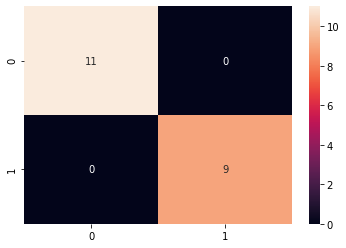

In [ ]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# **7. Save the model**

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(svm_model, "cat_dog_classifier.pkl")

['cat_dog_classifier.pkl']

In [ ]:
import joblib
svm_model=joblib.load("cat_dog_classifier.pkl")
svm_model

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **Input Image Detection**

Enter image link :https://www.dogster.com/wp-content/uploads/2015/05/doberman-puppies-11.jpg
Image is dog


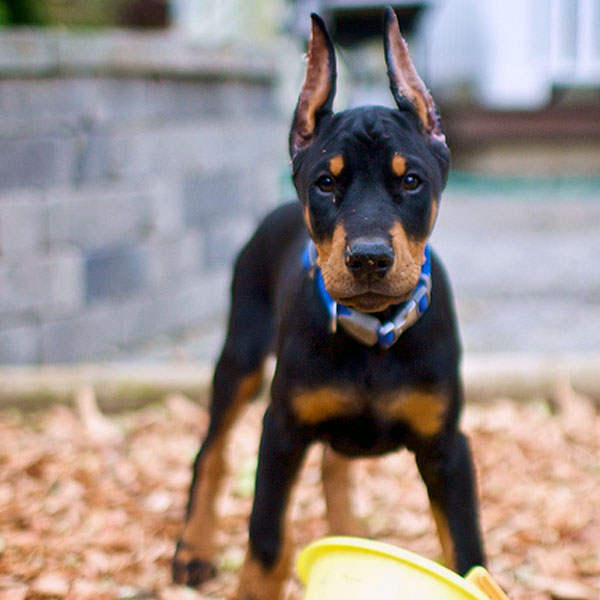

In [ ]:
from PIL import Image
from urllib.request import urlopen
url=input("Enter image link :")
img = Image.open(urlopen(url))
input_array=[]
ran_img=imread(url)
resized_img=resize(ran_img, (100, 100,3))
input_array.append(resized_img.flatten())
imgs=np.array(input_array)
y_pred=svm_model.predict(imgs)
if y_pred[0] == 0:
  print("Image is cat")
else:
  print("Image is dog")
img